# 1. Getting Used to Handling Language Data

In [1]:
from datasets import load_dataset

dataset = load_dataset("ag_news")

/Users/johnnybui/opt/miniconda3/envs/torch-mps/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Found cached dataset ag_news (/Users/johnnybui/.cache/huggingface/datasets/ag_news/default/0.0.0/bc2bcb40336ace1a0374767fc29bb0296cdaf8a6da7298436239c54d79180548)
100%|██████████| 2/2 [00:00<00:00, 61.43it/s]


In [2]:
dataset['train']['text'][0:10]
# dataset

["Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\\band of ultra-cynics, are seeing green again.",
 'Carlyle Looks Toward Commercial Aerospace (Reuters) Reuters - Private investment firm Carlyle Group,\\which has a reputation for making well-timed and occasionally\\controversial plays in the defense industry, has quietly placed\\its bets on another part of the market.',
 "Oil and Economy Cloud Stocks' Outlook (Reuters) Reuters - Soaring crude prices plus worries\\about the economy and the outlook for earnings are expected to\\hang over the stock market next week during the depth of the\\summer doldrums.",
 'Iraq Halts Oil Exports from Main Southern Pipeline (Reuters) Reuters - Authorities have halted oil export\\flows from the main pipeline in southern Iraq after\\intelligence showed a rebel militia could strike\\infrastructure, an oil official said on Saturday.',
 'Oil prices soar to all-time record, posing new menace to US economy (A

In [3]:
from collections import Counter 
from re import sub, compile
import matplotlib.pyplot as plt
import numpy as np

class UnimplementedFunctionError(Exception):
    pass

class Vocabulary:

    def __init__(self, corpus):

        self.word2idx, self.idx2word, self.freq = self.build_vocab(corpus)
        self.size = len(self.word2idx)

    def __len__(self):
        return len(self.word2idx.keys())
    
    def most_common(self, k):
        freq = sorted(self.freq.items(), key=lambda x: x[1], reverse=True)
        return [t for t,f in freq[:k]]


    def text2idx(self, text):
        tokens = self.tokenize(text)
        return [self.word2idx[t] if t in self.word2idx.keys() else self.word2idx['UNK'] for t in tokens]

    def idx2text(self, idxs):
        return [self.idx2word[i] if i in self.idx2word.keys() else 'UNK' for i in idxs]


    ###########################
    ## TASK 1.1                ##
    ###########################
    def tokenize(self, text):
        """
        
        tokenize takes in a string of text, remove punctuations and returns an 
        array of strings splitting the text into discrete tokens.

        :params: 
        - text: a string, e.g. "The blue dog jumped, but not high."

        :returns:
        - tokens: a list of strings derived from the text, e.g. ["the", "blue", 
        "dog", "jumped", "but", "not", "high"] for word-level tokenization
        
        """ 
        text = sub(r'[^\w\s]', '', text)
        return text.split()



    ###########################
    ## TASK 1.2                 ##
    ###########################
    def build_vocab(self,corpus):
        """
        
        build_vocab takes in list of strings corresponding to a text corpus, tokenizes the strings, and builds a finite vocabulary

        :params:
        - corpus: a list string to build a vocabulary over

        :returns: 
        - word2idx: a dictionary mapping token strings to their numerical index in the dictionary e.g. { "dog": 0, "but":1, ..., "UNK":129}
        - idx2word: the inverse of word2idx mapping an index in the vocabulary to its word e.g. {0: "dog", 1:"but", ..., 129:"UNK"}
        - freq: a dictionary of words and frequency counts over the corpus (including words not in the dictionary), e.g. {"dog":102, "the": 18023, ...}

        """ 
        word2idx = {}
        idx2word = {}
        freq = {}
        
        # Count tokens
        for s in corpus:
            for token in self.tokenize(s):
                if token not in freq.keys():
                    freq[token] = 1
                else:
                    freq[token] += 1
                    
        # Cutoff the tail
        cutoff = 50
        sorted_freq = sorted(freq.items(), key=lambda x: x[1], reverse=True)
        
        word2idx["UNK"] = 0
        idx2word[0] = "UNK"
        id = 1   # Preserve 0 for UNK
        for (token,cnt) in sorted_freq:
            if cnt > 50:
                word2idx[token] = id
                idx2word[id] = token
                id += 1
            else:
                break
            
        
        return word2idx, idx2word, freq
    
    ###########################
    ## TASK 1.3              ##
    ###########################
    def make_vocab_charts(self):
        """
        
        make_vocab_charts plots word frequency and cumulative coverage charts 
        for this vocabulary. See handout for more details

        
        """ 
        cutoff = 50
        
        ax1 = plt.figure(figsize=(16,6))
        ax1 = plt.subplot(1,2,1)
        
        sorted_freq = self.most_common(len(self.freq))
        most_freq = [self.freq[k] for k in sorted_freq]
        
        cutoff_idx = -1
        occ_sum = sum(most_freq)
        cfc = [0]
        for i in range(len(most_freq)):
            if cutoff_idx == -1 and most_freq[i] < cutoff:
                cutoff_idx = i - 1
                
            cfc.append((cfc[-1] + most_freq[i] / occ_sum))
        
        ax1.plot(list(range(len(most_freq))), most_freq)
        ax1.axhline(y=cutoff, color='r')
        ax1.text(0.8*len(most_freq), cutoff * 1.2,"freq = %d" % cutoff)
        ax1.set_yscale("log")
        ax1.set_xlabel("Token ID (sorted by frequency)")
        ax1.set_xlabel("Frequency")
        ax1.set_title("Token Frequency Distribution")

        ax2 = plt.subplot(1,2,2)
        ax2.plot(list(range(len(cfc[1:]))), cfc[1:])
        ax2.axvline(x=cutoff_idx, color='r', label=str(most_freq[cutoff_idx]))
        ax2.text(1.2*cutoff_idx, 0.95*cfc[cutoff_idx], "%.02f" % cfc[cutoff_idx])
        plt.title("Cumulative Fraction Covered")
        plt.xlabel("Token ID (sorted by frequency)")
        plt.ylabel("Fraction of Token Occurences Covered")
        
        plt.savefig("Vocabulary.jpg")


In [4]:
vocab = Vocabulary(dataset['train']['text'])
vocab.text2idx("Bears are hug sdfsf e~~~~!!!")

[1959, 36, 0, 0, 0]

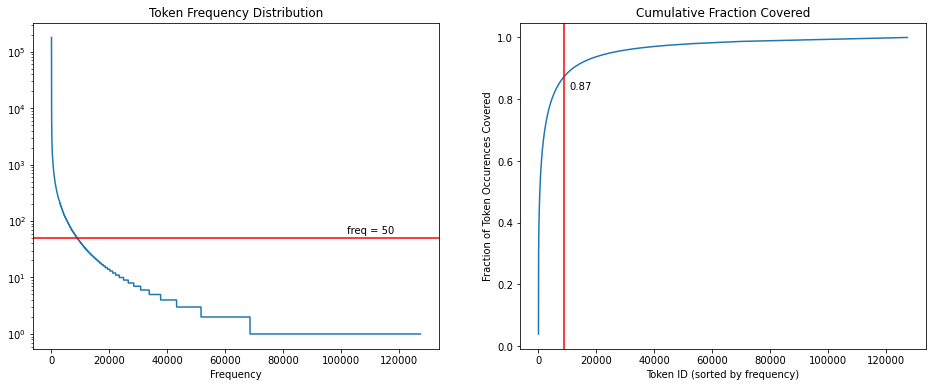

In [5]:
vocab.make_vocab_charts()

In [6]:
len(vocab)

8802

# 2. Frequency-Based Word Vectors - PPMI

In [122]:

from datasets import load_dataset
from Vocabulary import Vocabulary
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
from sklearn.utils.extmath import randomized_svd
import logging
import itertools
from sklearn.manifold import TSNE

import random
random.seed(42)
np.random.seed(42)

logging.basicConfig(
    format='%(asctime)s %(levelname)-8s %(message)s',
    level=logging.INFO,
    datefmt='%Y-%m-%d %H:%M:%S')

class UnimplementedFunctionError(Exception):
    pass


###########################
## TASK 2.2              ##
###########################

def compute_cooccurrence_matrix(corpus, vocab):
    """
        
        compute_cooccurrence_matrix takes in list of strings corresponding to a text corpus and a vocabulary of size N and returns 
        an N x N count matrix as described in the handout. It is up to the student to define the context of a word

        :params:
        - corpus: a list strings corresponding to a text corpus
        - vocab: a Vocabulary object derived from the corpus with N words

        :returns: 
        - C: a N x N matrix where the i,j'th entry is the co-occurrence frequency from the corpus between token i and j in the vocabulary

        """ 
    n = len(vocab)
    coor_matrix = np.eye(n,n)
    context_len = 2
    n_context = 0
    for text in corpus:
        text = "UNK UNK " + text + " UNK UNK"    # Avoid out of bound contexts
        indices = vocab.text2idx(text)
        n_context += (len(indices) - context_len*4)
        
        for i in range(3, len(indices) - 2):
            for j in range(i - 2, i):
                word = indices[i]
                context = indices[j]
                coor_matrix[word][context] += 1
                
            for j in range(i + 1, i + 3):
                word = indices[i]
                context = indices[j]
                coor_matrix[word][context] += 1
    
    return coor_matrix, n_context
    

In [26]:
coor_matrix = compute_cooccurrence_matrix(dataset['train']['text'], vocab)

# PPMI = compute_ppmi_matrix( [doc['text'] for doc in dataset['train']], vocab)

In [123]:
def compute_ppmi_matrix(corpus, vocab):
    """
        
        compute_ppmi_matrix takes in list of strings corresponding to a text corpus and a vocabulary of size N and returns 
        an N x N positive pointwise mutual information matrix as described in the handout. Use the compute_cooccurrence_matrix function. 

        :params:
        - corpus: a list strings corresponding to a text corpus
        - vocab: a Vocabulary object derived from the corpus with N words

        :returns: 
        - PPMI: a N x N matrix where the i,j'th entry is the estimated PPMI from the corpus between token i and j in the vocabulary

        """ 
    coor_matrix, n_context = compute_cooccurrence_matrix(corpus, vocab)
    n = len(vocab)
    word_count = np.zeros((1,n))
    
    for text in corpus:
        indices = vocab.text2idx(text)
        
        for idx in indices:
            word_count[0][idx] += 1
        
    prob = np.add(np.transpose(word_count).dot(word_count), 0.000001) 
    
    ppmi = np.maximum(np.log(np.add(np.divide(np.multiply(coor_matrix, n_context), prob), 0.000001)), 0)
    
    return ppmi

ppmi = compute_ppmi_matrix(dataset['train']['text'], vocab)
ppmi

array([[1.66308037, 1.10404256, 1.18783399, ..., 0.        , 0.90694853,
        0.4144723 ],
       [1.22307048, 0.        , 1.32676734, ..., 0.        , 0.        ,
        1.13093058],
       [1.33158533, 1.32676734, 0.        , ..., 0.28972603, 1.20601631,
        0.69519089],
       ...,
       [0.09601881, 0.        , 0.28972603, ..., 7.34066375, 0.        ,
        0.        ],
       [1.23545248, 0.        , 1.20601631, ..., 0.        , 7.34066375,
        0.        ],
       [0.09601881, 1.13093058, 0.        , ..., 0.        , 0.        ,
        7.34066375]])

In [ ]:
# Check nan members


/Users/johnnybui/opt/miniconda3/envs/torch-mps/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/johnnybui/opt/miniconda3/envs/torch-mps/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
100%|██████████| 1000/1000 [00:00<00:00, 5960.43it/s]


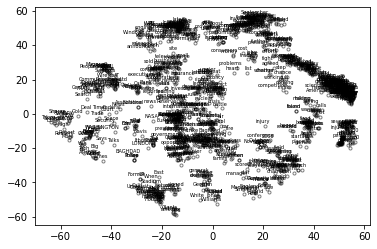

In [124]:
def dim_reduce(PPMI, k=16):
    U, Sigma, VT = randomized_svd(PPMI, n_components=k, n_iter=10, random_state=42)
    SqrtSigma = np.sqrt(Sigma)[np.newaxis,:]

    U = U*SqrtSigma
    V = VT.T*SqrtSigma

    word_vectors = np.concatenate( (U, V), axis=1) 
    word_vectors = word_vectors / np.linalg.norm(word_vectors, axis=1)[:,np.newaxis]

    return word_vectors


def plot_word_vectors_tsne(word_vectors, vocab):
    coords = TSNE(metric="cosine", perplexity=50, random_state=42).fit_transform(word_vectors)

    plt.cla()
    top_word_idx = vocab.text2idx(" ".join(vocab.most_common(1000)))
    plt.plot(coords[top_word_idx,0], coords[top_word_idx,1], 'o', markerfacecolor='none', markeredgecolor='k', alpha=0.5, markersize=3)

    for i in tqdm(top_word_idx):
        plt.annotate(vocab.idx2text([i])[0],
            xy=(coords[i,0],coords[i,1]),
            xytext=(5, 2),
            textcoords='offset points',
            ha='right',
            va='bottom',
            fontsize=5)
    plt.show()

word_vectors = dim_reduce(ppmi)
plot_word_vectors_tsne(word_vectors, vocab)

In [69]:
word_count[0][vocab.text2idx("ultra")]

array([4.])

# 3. Learning-Based Word Vectors - GloVe

# 4. Exploring Learned Biases in word2vec Vectors